# Module

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import calendar

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("ggplot")

# Data

In [2]:
data_path = "./data/"

train = pd.read_csv(data_path + "train.csv")
test = pd.read_csv(data_path + "test.csv")
submission = pd.read_csv(data_path + "sampleSubmission.csv")

In [3]:
train.shape, test.shape, submission.shape

((10886, 12), (6493, 9), (6493, 2))

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


# Feature

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
print(train['datetime'][50])
print(train['datetime'][50].split())

print(train['datetime'][50].split()[0]) 
print(train['datetime'][50].split()[0].split('-')[0]) # year
print(train['datetime'][50].split()[0].split('-')[1]) # month
print(train['datetime'][50].split()[0].split('-')[2]) # day

print(train['datetime'][50].split()[1].split(':')[0]) # hour
print(train['datetime'][50].split()[1].split(':')[1]) # min
print(train['datetime'][50].split()[1].split(':')[2]) # sec

2011-01-03 05:00:00
['2011-01-03', '05:00:00']
2011-01-03
2011
01
03
05
00
00


In [9]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0])

train['year'] = train['date'].apply(lambda x: x.split('-')[0])
train['month'] = train['date'].apply(lambda x: x.split('-')[1])
train['day'] = train['date'].apply(lambda x: x.split('-')[2])

train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04


In [10]:
print(datetime.strptime(train['date'][50], '%Y-%m-%d'))
print(datetime.strptime(train['date'][50], '%Y-%m-%d').weekday())
print(calendar.day_name[datetime.strptime(train['date'][50], '%Y-%m-%d').weekday()])

2011-01-03 00:00:00
0
Monday


In [11]:
train['weekday'] = train['date'].apply(lambda x: calendar.day_name[datetime.strptime(x, '%Y-%m-%d').weekday()])

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,Saturday


In [12]:
train['season'] = train['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

train['weather'] = train['weather'].map({1: 'clear', 2: 'misty, cloudy', 3: 'snow, rain, thunderstorm', 4: 'heavy rain, thunderstorm, snow, fog'})

In [13]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday
0,2011-01-01 00:00:00,spring,0,0,clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,Saturday
1,2011-01-01 01:00:00,spring,0,0,clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,Saturday
2,2011-01-01 02:00:00,spring,0,0,clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,Saturday
3,2011-01-01 03:00:00,spring,0,0,clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,Saturday
4,2011-01-01 04:00:00,spring,0,0,clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,Saturday


In [14]:
train = train[['datetime', 'year', 'month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weekday',
'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

In [15]:
train.head()

,datetime,year,month,day,hour,season,holiday,workingday,weekday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,2011,01,01,00,spring,0,0,Saturday,clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,2011,01,01,01,spring,0,0,Saturday,clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,2011,01,01,02,spring,0,0,Saturday,clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,2011,01,01,03,spring,0,0,Saturday,clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,2011,01,01,04,spring,0,0,Saturday,clear,9.84,14.395,75,0.0,0,1,1


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   year        10886 non-null  object 
 2   month       10886 non-null  object 
 3   day         10886 non-null  object 
 4   hour        10886 non-null  object 
 5   season      10886 non-null  object 
 6   holiday     10886 non-null  int64  
 7   workingday  10886 non-null  int64  
 8   weekday     10886 non-null  object 
 9   weather     10886 non-null  object 
 10  temp        10886 non-null  float64
 11  atemp       10886 non-null  float64
 12  humidity    10886 non-null  int64  
 13  windspeed   10886 non-null  float64
 14  casual      10886 non-null  int64  
 15  registered  10886 non-null  int64  
 16  count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(8)
memory usage: 1.4+ MB


# Viz

In [17]:
mpl.rc('font', size=15)

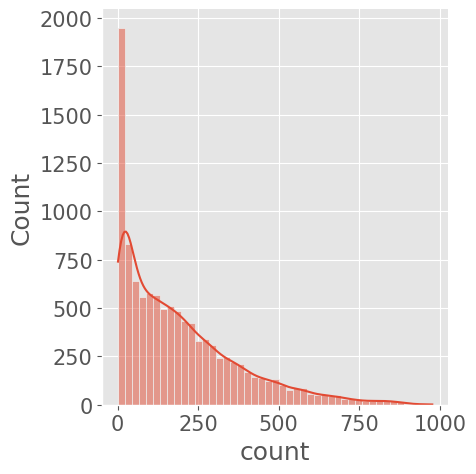

In [18]:
# 타겟값 분포 확인
sns.displot(data=train, x='count', kde=True)
plt.show()

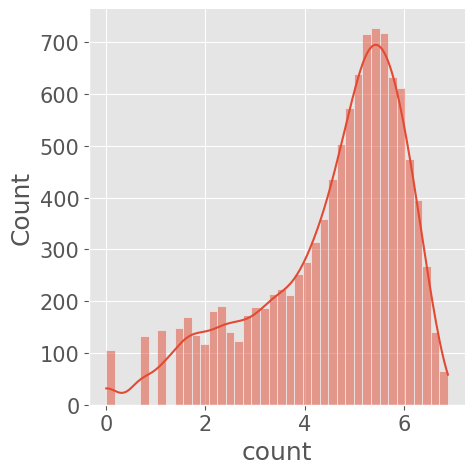

In [19]:

sns.displot(np.log(train['count']), kde=True)
plt.show()

- 타겟값의 로그 변환 사용 고려

In [20]:
print("--- 'year' 컬럼 정보 ---")
print(type(train['year']))
print(f"차원: {train['year'].ndim}\n")

print("--- 'count' 컬럼 정보 ---")
print(type(train['count']))
print(f"차원: {train['count'].ndim}")

--- 'year' 컬럼 정보 ---
<class 'pandas.core.series.Series'>
차원: 1

--- 'count' 컬럼 정보 ---
<class 'pandas.core.series.Series'>
차원: 1


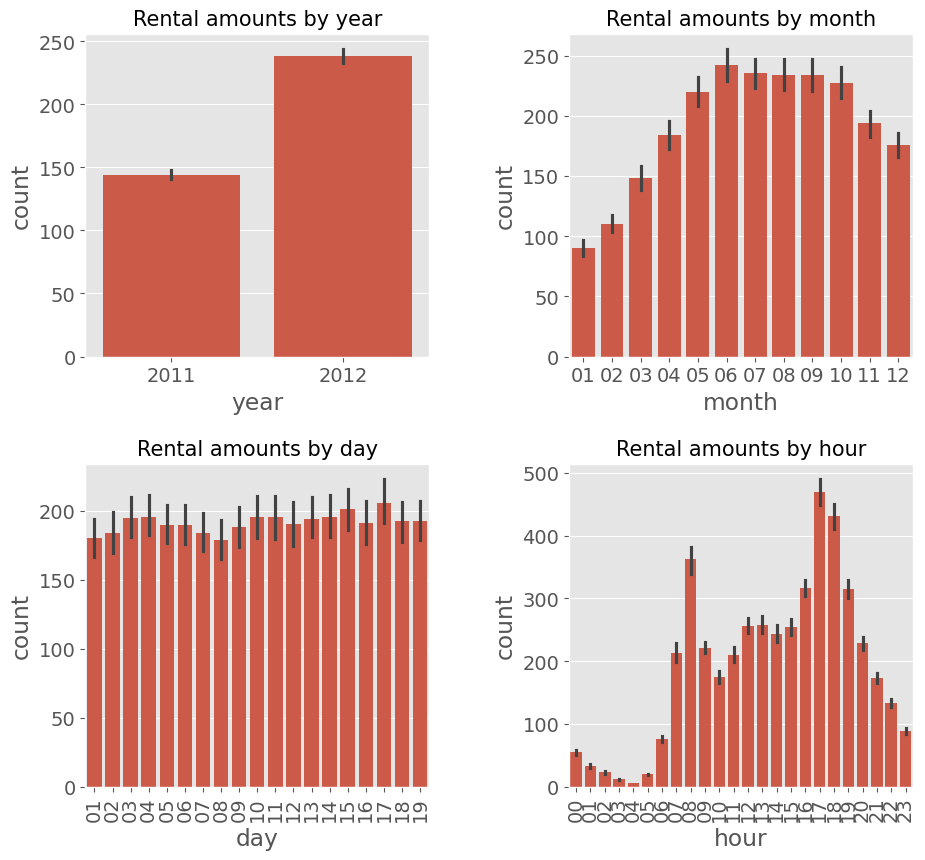

In [21]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 9)

sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])

axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')

axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

- 일별 대여량에 따른 데이터는 사용하기 어려움
    - 훈련 데이터에는 1~19일의 데이터가 포함되어 있고, 테스트 데이터에는 이후 일자의 데이터가 들어 있음

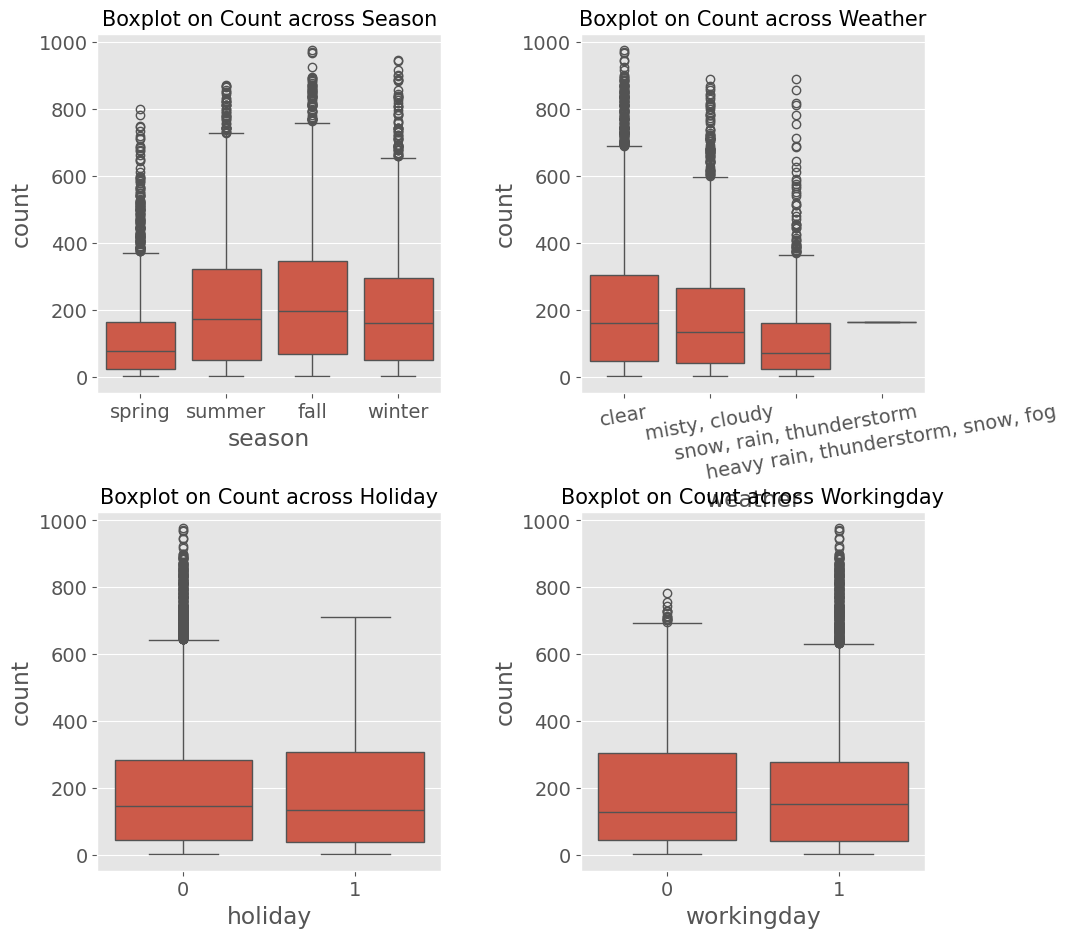

In [22]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 10)

sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

axes[0, 0].set(title='Boxplot on Count across Season')
axes[0, 1].set(title='Boxplot on Count across Weather')
axes[1, 0].set(title='Boxplot on Count across Holiday')
axes[1, 1].set(title='Boxplot on Count across Workingday')

axes[0, 1].tick_params(axis='x', labelrotation=10)

- 공휴일이 아닌 근무일에는 이상치 데이터가 다수 존재

<Axes: xlabel='hour', ylabel='count'>

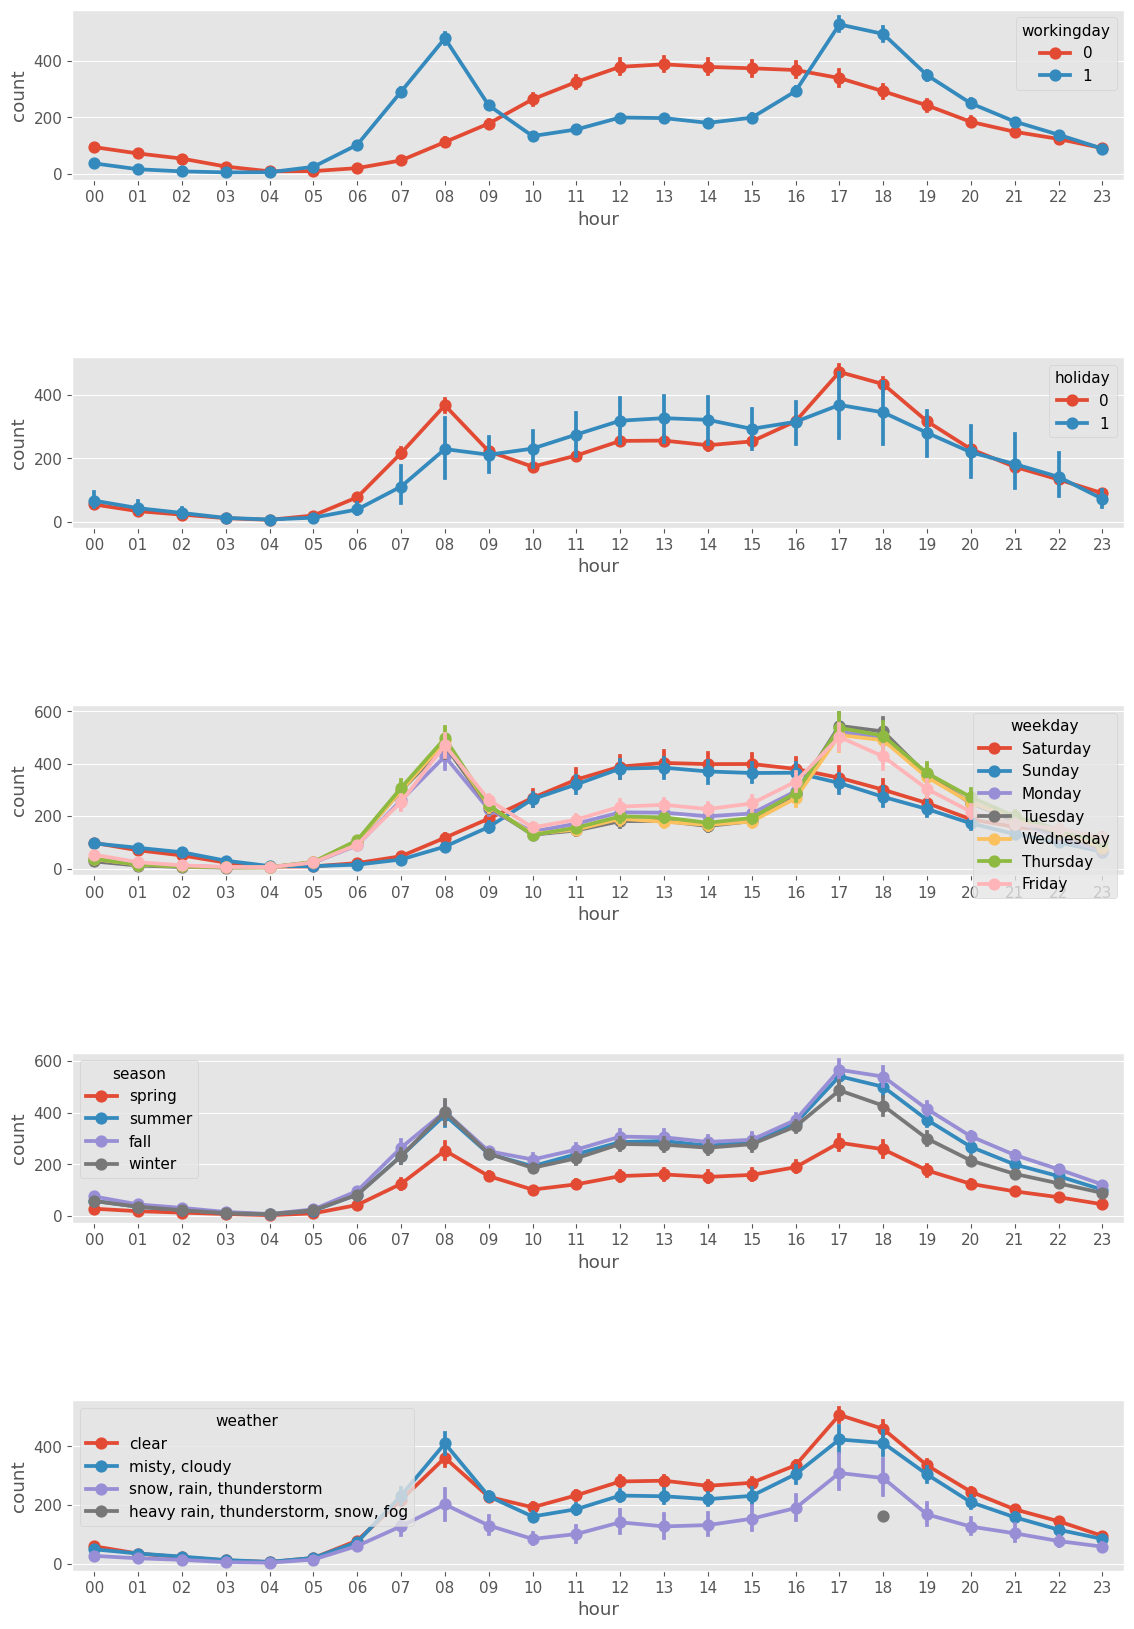

In [23]:
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
plt.tight_layout()
figure.set_size_inches(12, 18)

sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4])

- 악천후일 때, 18시에 대여 건수가 존재. 전체적인 데이터가 부족해 악천후에 해당하는 데이터는 제외하는 것도 고려할만 함

<Axes: xlabel='humidity', ylabel='count'>

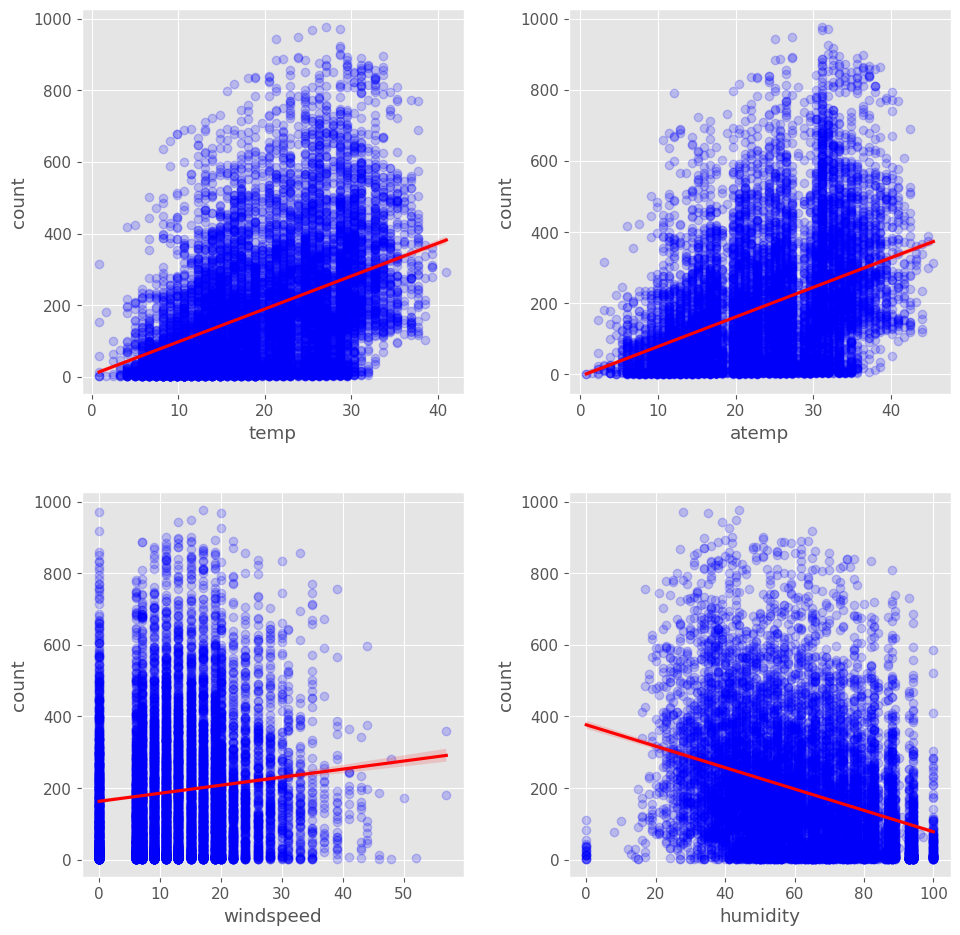

In [26]:
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 10)

sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], scatter_kws={'alpha':0.2, 'color':'blue'}, line_kws={'color':'red'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], scatter_kws={'alpha':0.2, 'color':'blue'}, line_kws={'color':'red'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0], scatter_kws={'alpha':0.2, 'color':'blue'}, line_kws={'color':'red'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1], scatter_kws={'alpha':0.2, 'color':'blue'}, line_kws={'color':'red'})

- windspeed가 0으로 찍힌 데이터가 다수 존재하여 해당 특성의 효과가 적을 것으로 예상됨

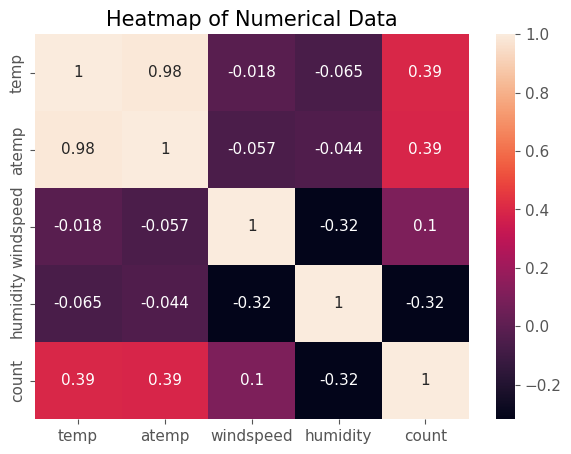

In [29]:
df_corr = train[['temp', 'atemp', 'windspeed', 'humidity', 'count']].corr()
figure, axes = plt.subplots()
figure.set_size_inches(7, 5)

sns.heatmap(df_corr, annot=True)
axes.set(title="Heatmap of Numerical Data")
plt.show()

- windspeed는 타겟값과 상관관계가 약한데 앞선 그래프에서 보았듯이 0으로 기록된 데이터가 다수 존재하는 것이 영향이 있다고 추정됨